# import & load data

In [27]:
%run imports_N_loadData.ipynb

load&process Synthetic data===========================
len(ground_truth_synthetic): 45
---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_df_synthetic) 3519
len(rate_df_synthetic) 95
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


In [5]:
#!pip install astropy

# the curve fitting for pattern in literature

In [4]:
file_path=pressure_filePath="../data_input/pattern_left.txt"
pattern_left = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_left["X"]= pattern_left["X"]-pattern_left["X"][0]
pattern_left["Y"]= pattern_left["Y"]-pattern_left["Y"][0]
print(pattern_left.describe())

pattern_left_top=pattern_left.loc[pattern_left["Y"]>0]
pattern_left_bottom=pattern_left.loc[pattern_left["Y"]<0]

                X           Y
count  106.000000  106.000000
mean    -6.447343    1.100501
std      3.845383    2.987507
min    -14.049790   -2.763160
25%     -9.565758   -2.051525
50%     -6.371515    1.160395
75%     -3.177262    4.181658
max      0.000000    5.118920


In [5]:
file_path=pressure_filePath="../data_input/pattern_right_top.txt"
pattern_right_top = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_top["X"]= pattern_right_top["X"]-pattern_right_top["X"][0]
pattern_right_top["Y"]= pattern_right_top["Y"]-pattern_right_top["Y"][0]
pattern_right_top= pattern_right_top.clip(lower=0)
print(pattern_right_top.describe())
# pd.set_option('display.max_rows', pattern_right_top.shape[0]+1)
# pattern_right_top 


               X          Y
count  69.000000  69.000000
mean    1.339242   8.207413
std     1.180701   5.028328
min     0.000000   0.000000
25%     0.371150   3.726520
50%     0.962310   8.391060
75%     2.050570  12.649460
max     4.186780  16.254090


In [6]:
file_path=pressure_filePath="../data_input/pattern_right_bottom.txt"
pattern_right_bottom = pd.read_csv(file_path, delimiter=" ",skiprows=1, names=["X", "Y"],skipinitialspace = True)
pattern_right_bottom["X"]= pattern_right_bottom["X"]-pattern_right_bottom["X"][0]
pattern_right_bottom["Y"]= pattern_right_bottom["Y"]-pattern_right_bottom["Y"][0]

pattern_right_bottom= pattern_right_bottom.clip(lower=0)

print(pattern_right_bottom.describe())


               X          Y
count  77.000000  77.000000
mean    5.628174   6.761963
std     3.985883   3.379727
min     0.000000   0.000000
25%     1.995140   4.067440
50%     5.219620   7.767010
75%     9.048680   9.699000
max    12.877740  10.923490


In [7]:
def test_func_1(x, a,b,c,d):
    y = a+b*x-c*np.exp(d*x)
    return y
def test_func_2(x, a,b,c,d):
    y = a+b*x-c*np.exp(-d*x)
    return y

In [8]:
def fit_curve(xdata,ydata,test_func):
    x = np.asarray(xdata)
    y = np.asarray(ydata)
    parameters, covariance = curve_fit(test_func, x, y)

    fit_a = parameters[0]
    fit_b = parameters[1]
    fit_c = parameters[2]
    fit_d = parameters[3]

    print(F'The parameters is {parameters}.')

    y_fit = test_func(x, fit_a, fit_b,fit_c,fit_d)

    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_fit, '-', label='LJ fit')
    return fit_a,fit_b,fit_c,fit_d

The parameters is [ 4.12959938 -0.07459858  4.31571225  0.27952833].
The parameters is [-3.00297354e+00 -3.35921627e-04 -2.99822437e+00  2.29392013e-01].
The parameters is [13.14227315  0.78460405 13.4545323   0.90468973].
The parameters is [8.77210719 0.17952762 8.95294473 0.28833003].


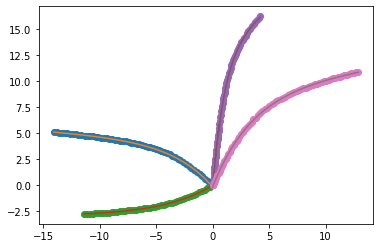

In [9]:
fit_parameters={}
curves=[pattern_left_top,pattern_left_bottom,pattern_right_top,pattern_right_bottom]
test_func=[test_func_1,test_func_1,test_func_2,test_func_2]
names=["pattern_left_top","pattern_left_bottom","pattern_right_top","pattern_right_bottom"]
for curve, func,name in zip(curves,test_func,names):
    xdata=curve["X"]
    ydata=curve["Y"]
    fit_parameters[name]=fit_curve(xdata,ydata,func)


# Synthetic data_1

## learn from real case, predict synthetic

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
start to predict using pattern...
after second prediction, there are 25 detected buildup points, 393 drawdown detected
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after second prediction, the results are filtered further, there are 41 detected buildup points, 139 drawdown detected
************************************

<Figure size 1440x720 with 0 Axes>

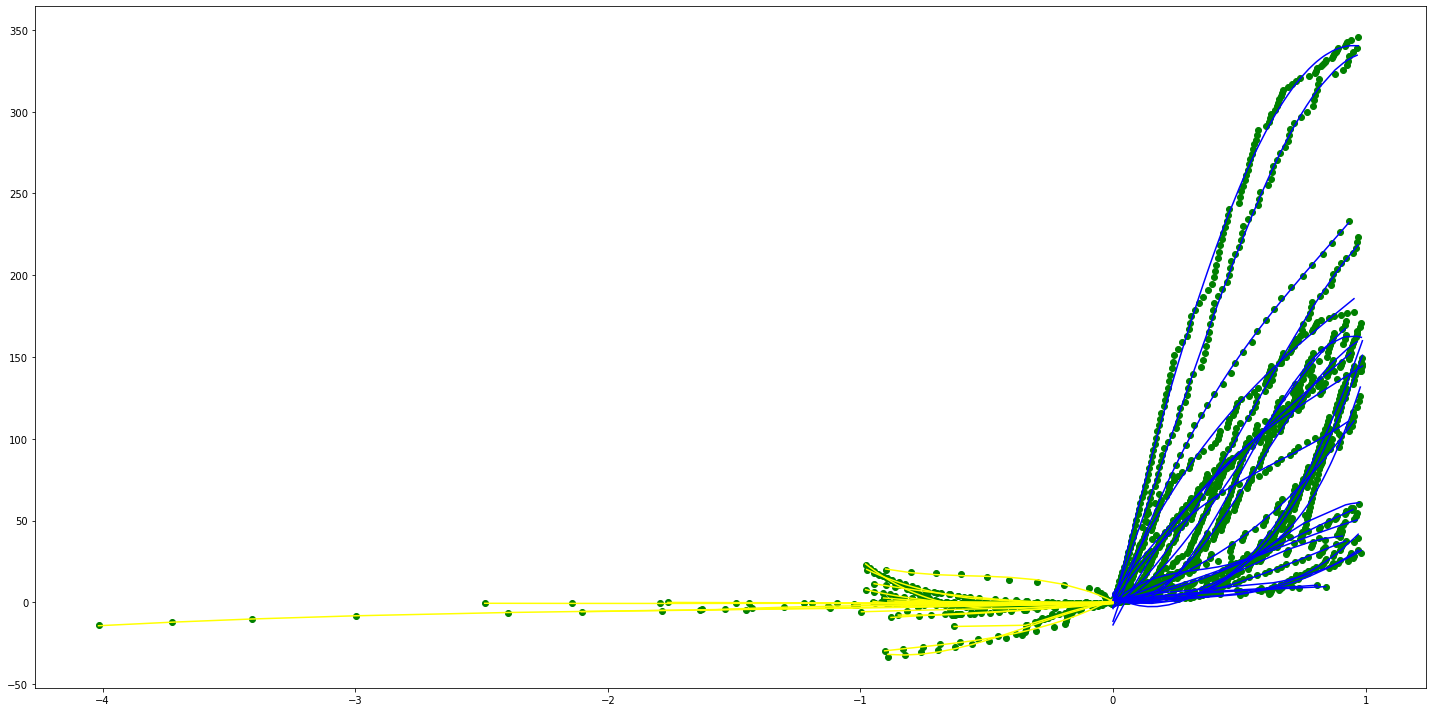

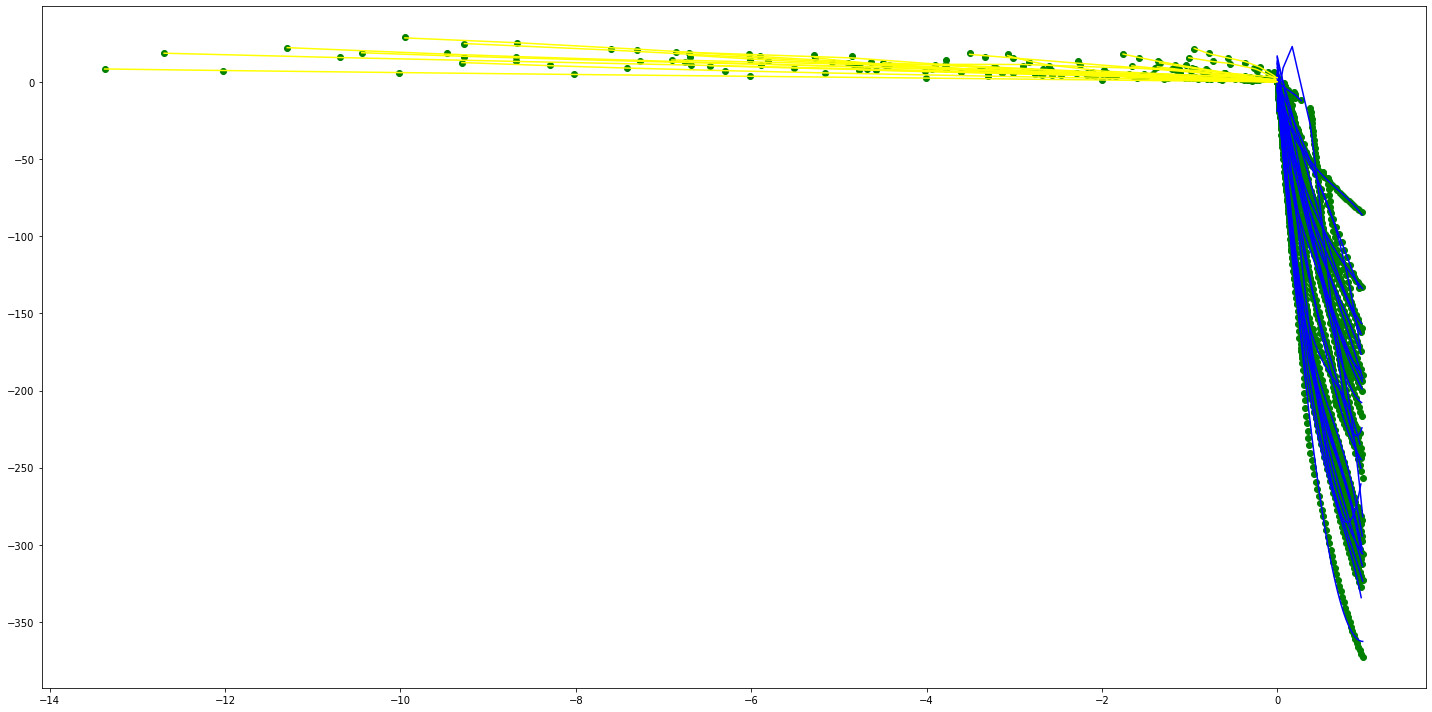

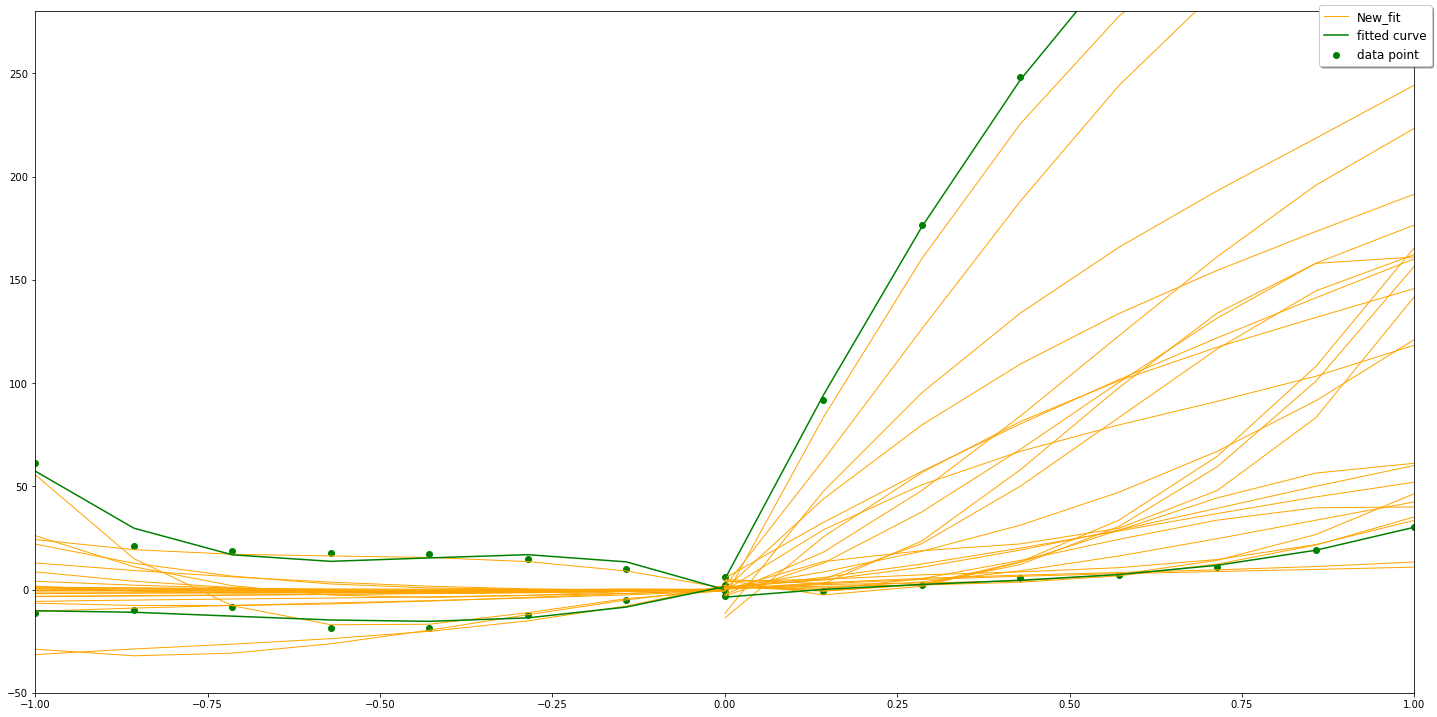

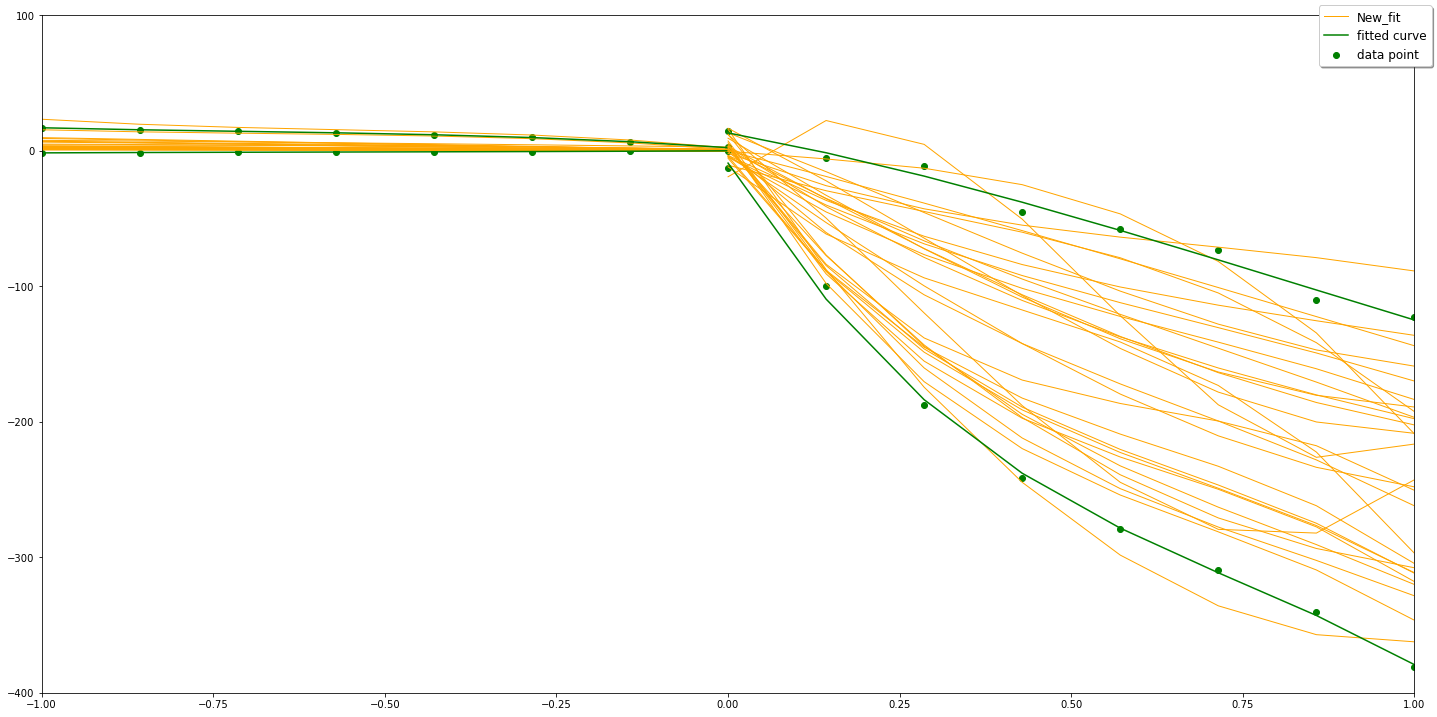

<Figure size 1440x720 with 0 Axes>

In [12]:
#detect 
percentile_tuning={
                    "buildUp":{"left":[100,10],
                              "right":[100,10]},
                   "drawDown":{"left":[95,6],
                              "right":[95,3]}
                   }

fine_tuning={"buildUp":{"left_top":1.1,
                    "left_bottom":1.1,
                    "right_top":1.1,
                    "right_bottom":0.9},
            "drawDown":{"left_top":1.1,
                        "left_bottom":-1.1,
                        "right_top":0.9,
                        "right_bottom":1.1}}


point_halfWindow=8
identfication_UsePattern=PatternRecognitionMethod(time_halfWindow_forPredict=1,time_halfWindow_forLearn=1,percentile_tuning=percentile_tuning,fine_tuning=fine_tuning)


fitting_type="polynomial"
identfication_UsePattern.learn(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised,fitting_type=fitting_type)
points=[index for index in range(len(pressure_measure_synthetic))]
buildup1,drawdown1=identfication_UsePattern.predict(pressure_measure_synthetic,pressure_time_synthetic,points,fitting_type=fitting_type)
print("************************************")
print(f"result after second detection: buildUp,{len(buildup1)}, drawDown {len(drawdown1)}")

---initializing...
---plotting...


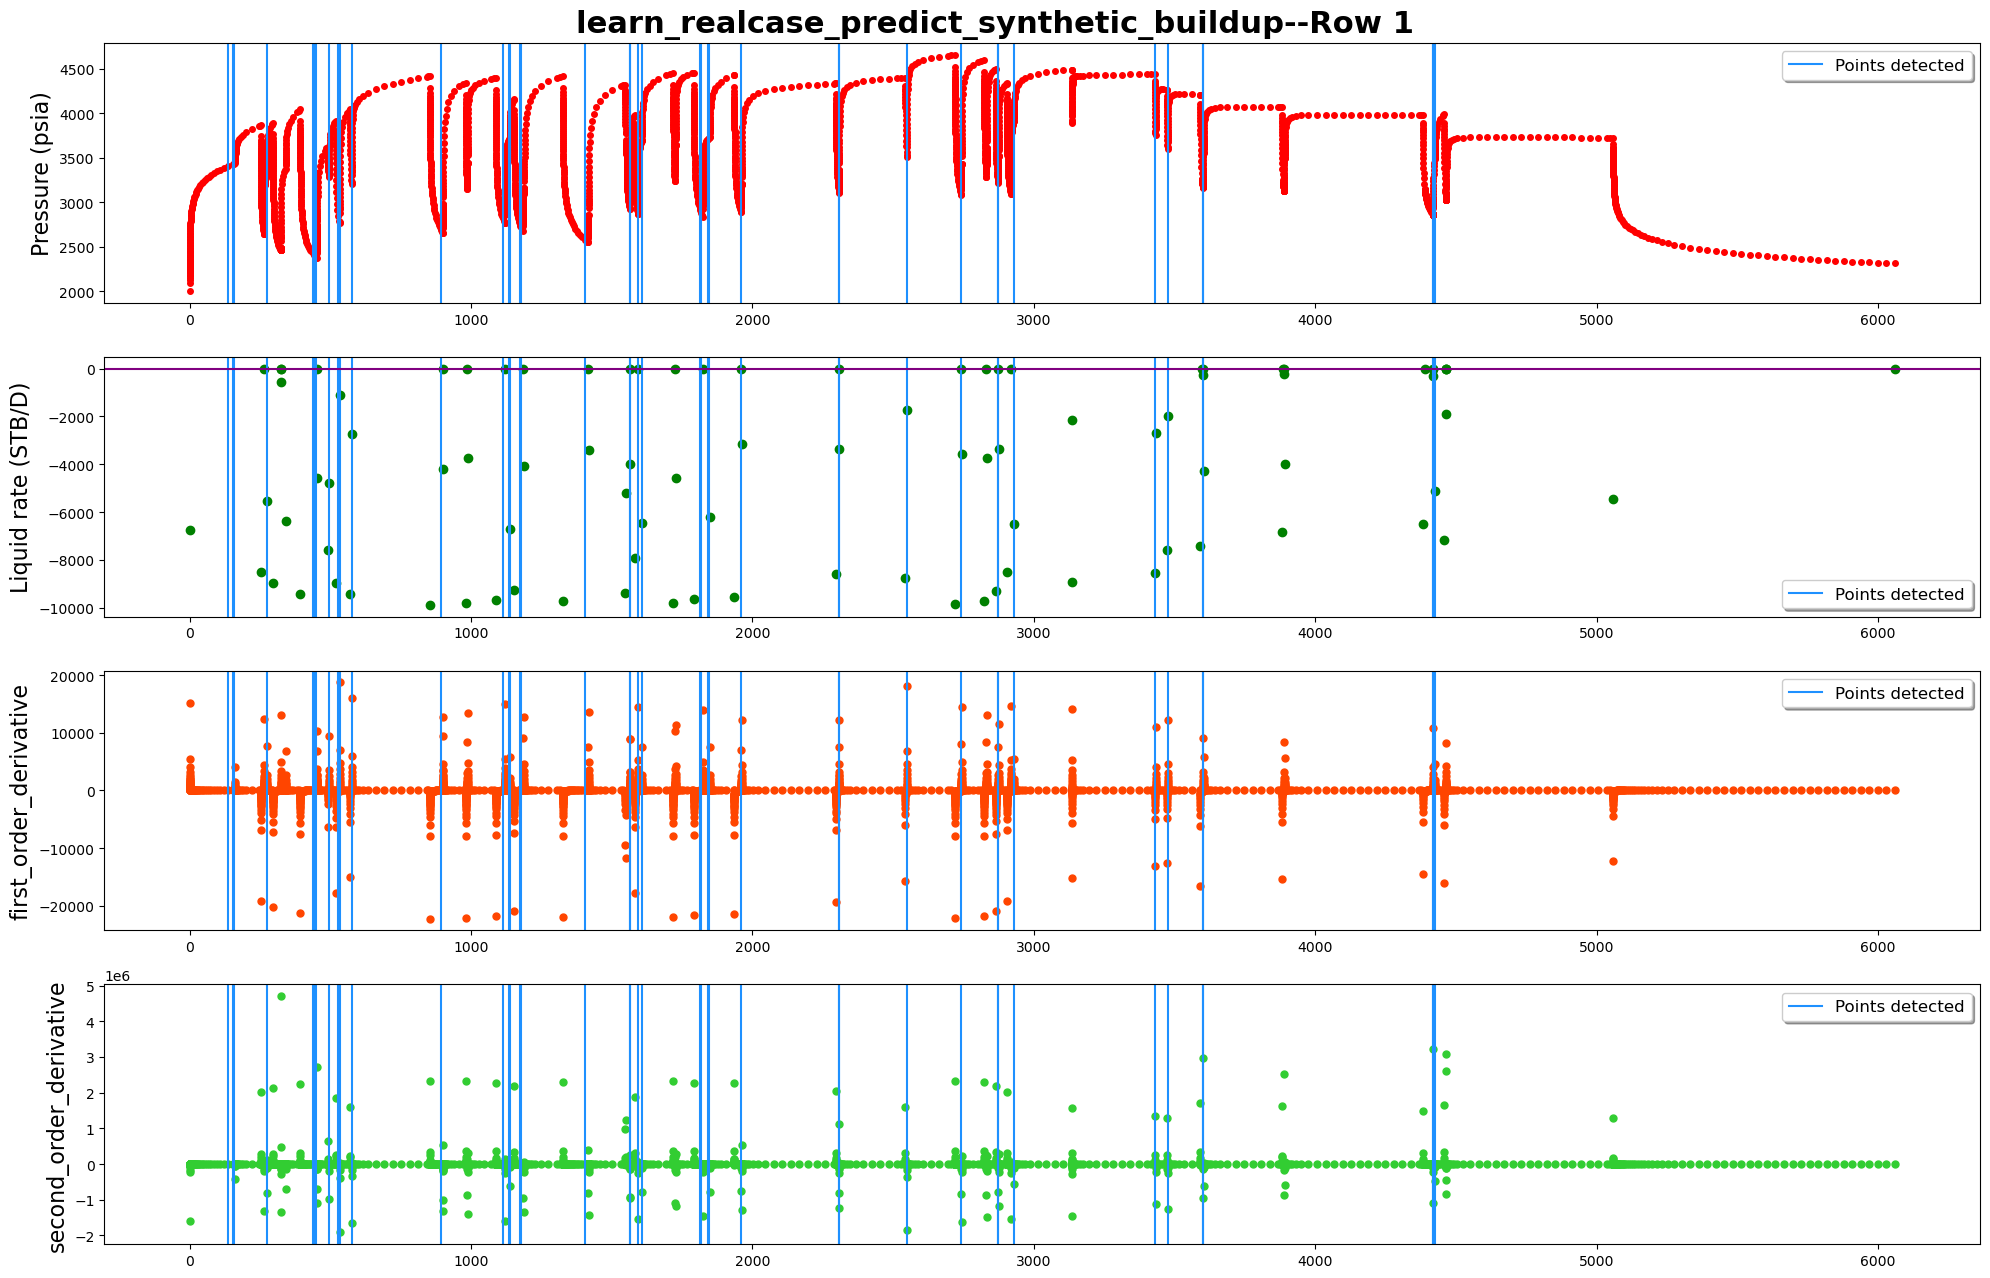

save whole....
detected 41 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[77, 78, 79, 218]
------row 2-----detected points:[442, 443, 444, 522, 565, 567, 610, 710]
------row 3-----detected points:[949, 1012, 1013, 1097, 1098]
------row 4-----detected points:[1251, 1394, 1395, 1511, 1570]
------row 5-----detected points:[1780, 1781, 1844, 1845, 1937]
------row 6-----detected points:[2071, 2072, 2155, 2246]
------row 7-----detected points:[2485, 2486, 2666, 2763]
------row 8-----detected points:[2806, 2900, 2901]
------row 9-----detected points:[3223, 3224, 3259]
---initializing...
---plotting...


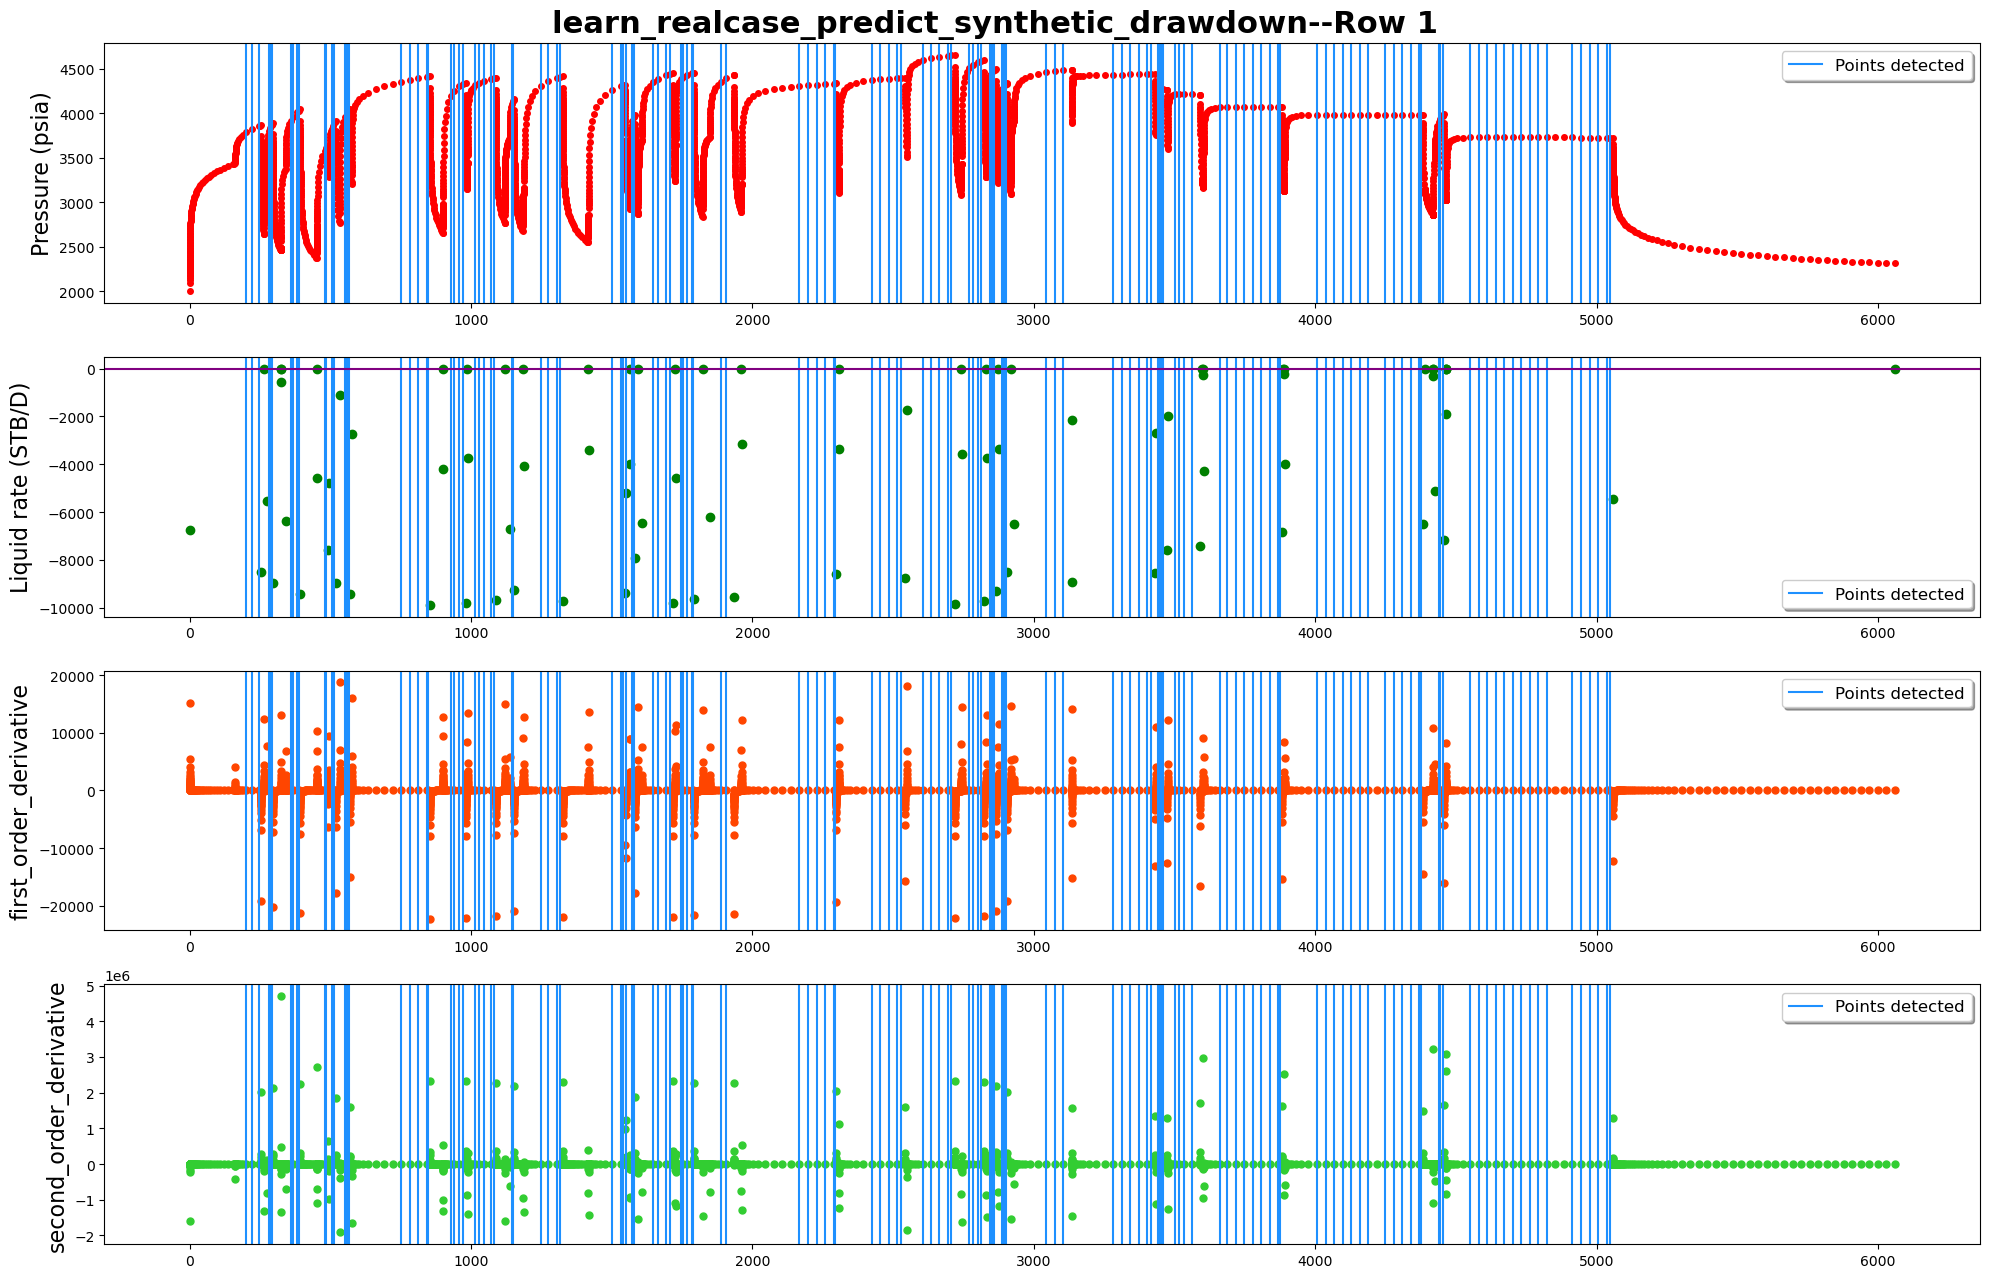

save whole....
detected 139 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[103, 104, 105, 239, 240, 241, 371, 372, 373, 374]
------row 2-----detected points:[502, 503, 542, 543, 544, 589, 590, 591, 639, 640, 641, 642, 643, 767, 768, 769, 770]
------row 3-----detected points:[882, 883, 884, 885, 886, 1033, 1034, 1175, 1176, 1177, 1178]
------row 4-----detected points:[1316, 1317, 1318, 1338, 1453, 1454, 1594, 1595, 1596, 1597]
------row 5-----detected points:[1714, 1715, 1716, 1717, 1718, 1871, 1872]
------row 6-----detected points:[2011, 2012, 2013, 2014, 2015, 2016, 2132, 2133, 2134, 2135, 2136, 2180, 2181, 2182, 2183, 2184, 2311, 2312, 2313, 2314]
------row 7-----detected points:[2429, 2430, 2431, 2548, 2549, 2550, 2693, 2694, 2695, 2740, 2741, 2742, 2743, 2744, 2745, 2783, 2784, 2785, 2786]
------row 8-----detected points:[2829, 2830, 2831, 2832, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 30

In [14]:
#plot & save
pressure_df=pressure_df_synthetic
rate_df=rate_df_synthetic
data_inOneRow=data_inOneRow_synthetic
colum_names=colum_names_synthetic
plot_whole=True
plot_details=False
plot_statistics=False
breakpoints=[buildup1,drawdown1]
names=["buildup","drawdown"]
txt=print_tuning_parameters(percentile_tuning,fine_tuning)
for points,name in zip(breakpoints,names):
    
    filename_toSave_whole=f"../data_output/Pattern_recognition/learn_realcase_predict_synthetic_{name}_whole.pdf"
    filename_toSave_details=f"../data_output/Pattern_recognition/learn_realcase_predict_synthetic_{name}.pdf"
    plot_name=f"learn_realcase_predict_synthetic_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)
     

## learn from synthetic, predict synthetic

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 22 points are detected as buildup, 23 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 22 for calculation
-----start to calculate'drawDown' pattern parameter, there are 23 for calculation
start to predict using pattern...
after second prediction, there are 116 detected buildup points, 0 drawdown detected
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after second prediction, the results are filtered further, there are 115 detected buildup points, 0 drawdown detected
************************************
r

<Figure size 1440x720 with 0 Axes>

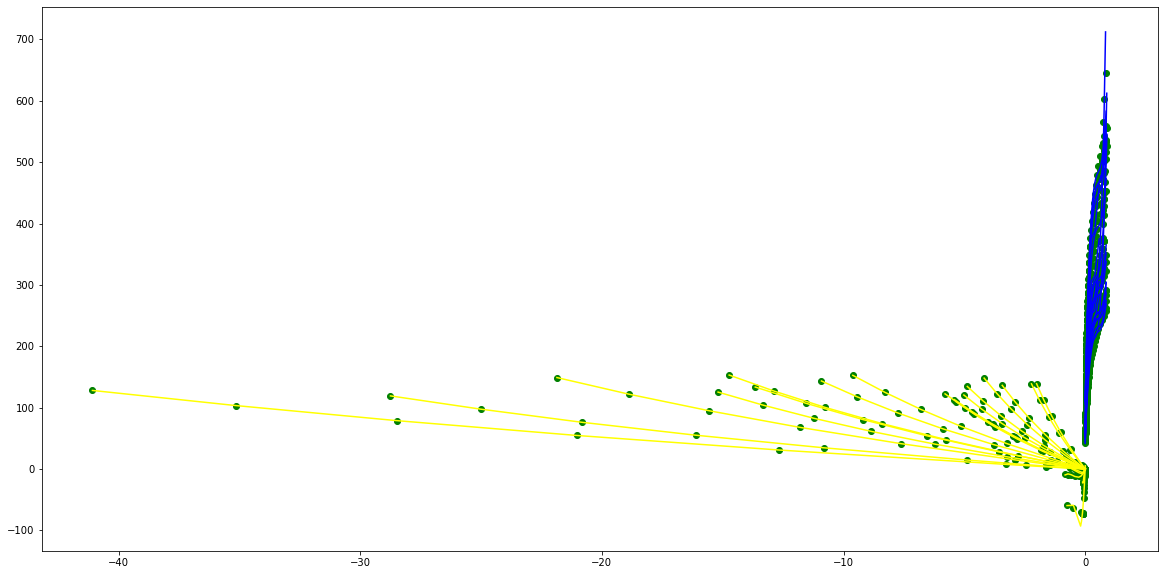

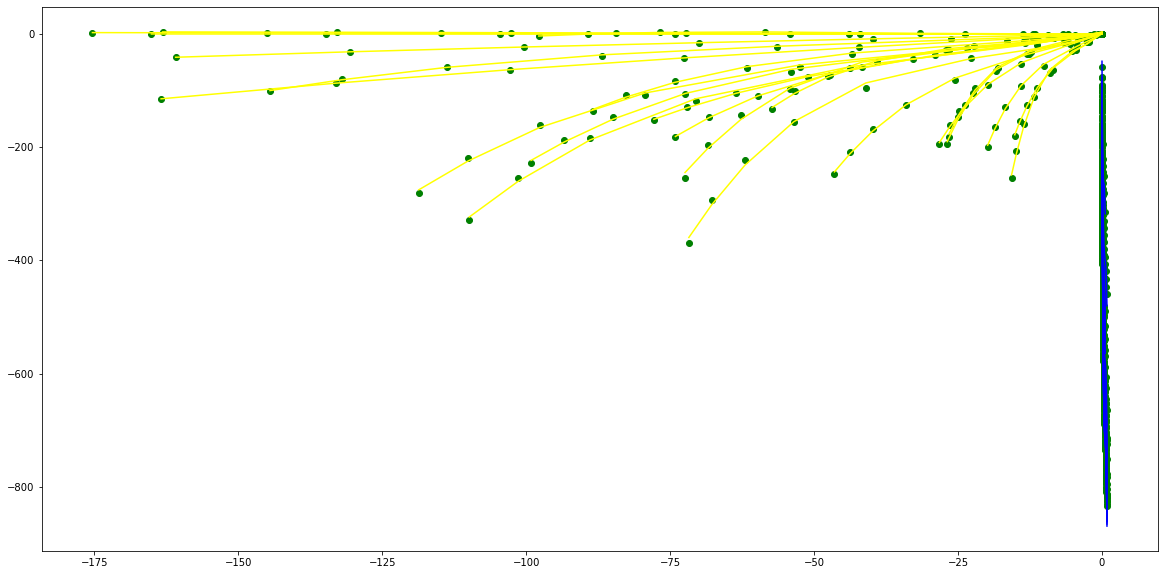

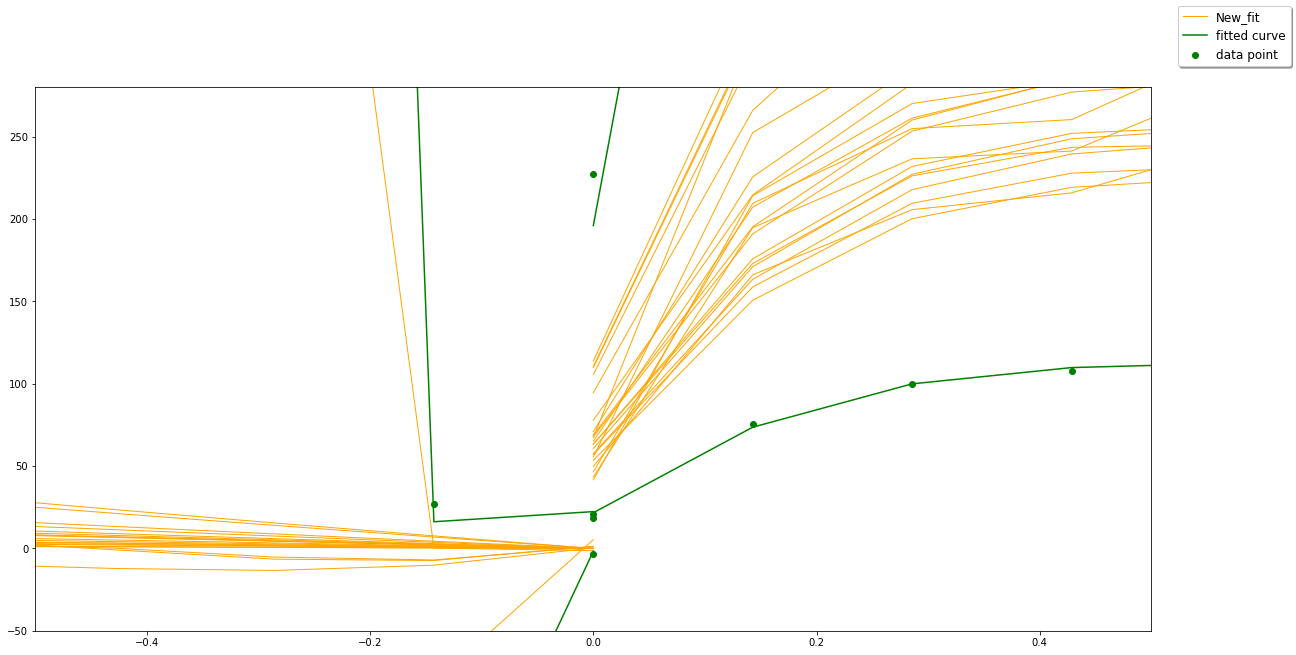

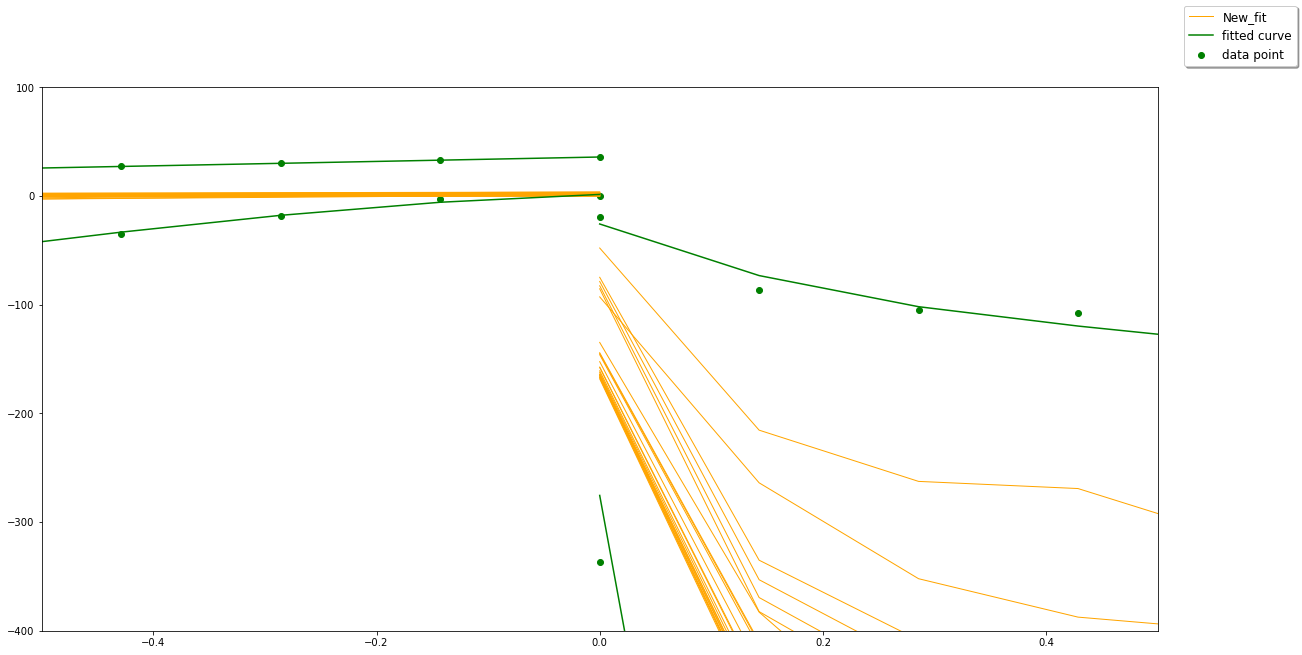

<Figure size 1440x720 with 0 Axes>

In [5]:
percentile_tuning={
                                    "buildUp":{"left":[98,0],
                                              "right":[98,0]},
                                   "drawDown":{"left":[100,0],
                                              "right":[100,0]}
                                   }

fine_tuning={"buildUp":{"left_top":3.5,
                    "left_bottom":2.5,
                    "right_top":2,
                    "right_bottom":0.5},
            "drawDown":{"left_top":10,
                        "left_bottom":15,
                        "right_top":0.4,
                        "right_bottom":2}}
time_halfWindow_forPredict=0.5
time_halfWindow_forLearn=1
identfication_UsePattern=PatternRecognitionMethod(time_halfWindow_forPredict=time_halfWindow_forPredict,
                                                  time_halfWindow_forLearn=time_halfWindow_forLearn,
                                                  percentile_tuning=percentile_tuning,
                                                  fine_tuning=fine_tuning)

points=[index for index in range(len(pressure_measure_synthetic))]
fitting_type="polynomial"
identfication_UsePattern.learn(pressure_measure_synthetic,pressure_time_synthetic,ground_truth_synthetic,fitting_type=fitting_type)
buildup2,drawdown2=identfication_UsePattern.predict(pressure_measure_synthetic,pressure_time_synthetic,points,fitting_type=fitting_type)
print("************************************")
print(f"result after second detection: buildUp,{len(buildup2)}, drawDown {len(drawdown2)}")

---initializing...
---plotting...


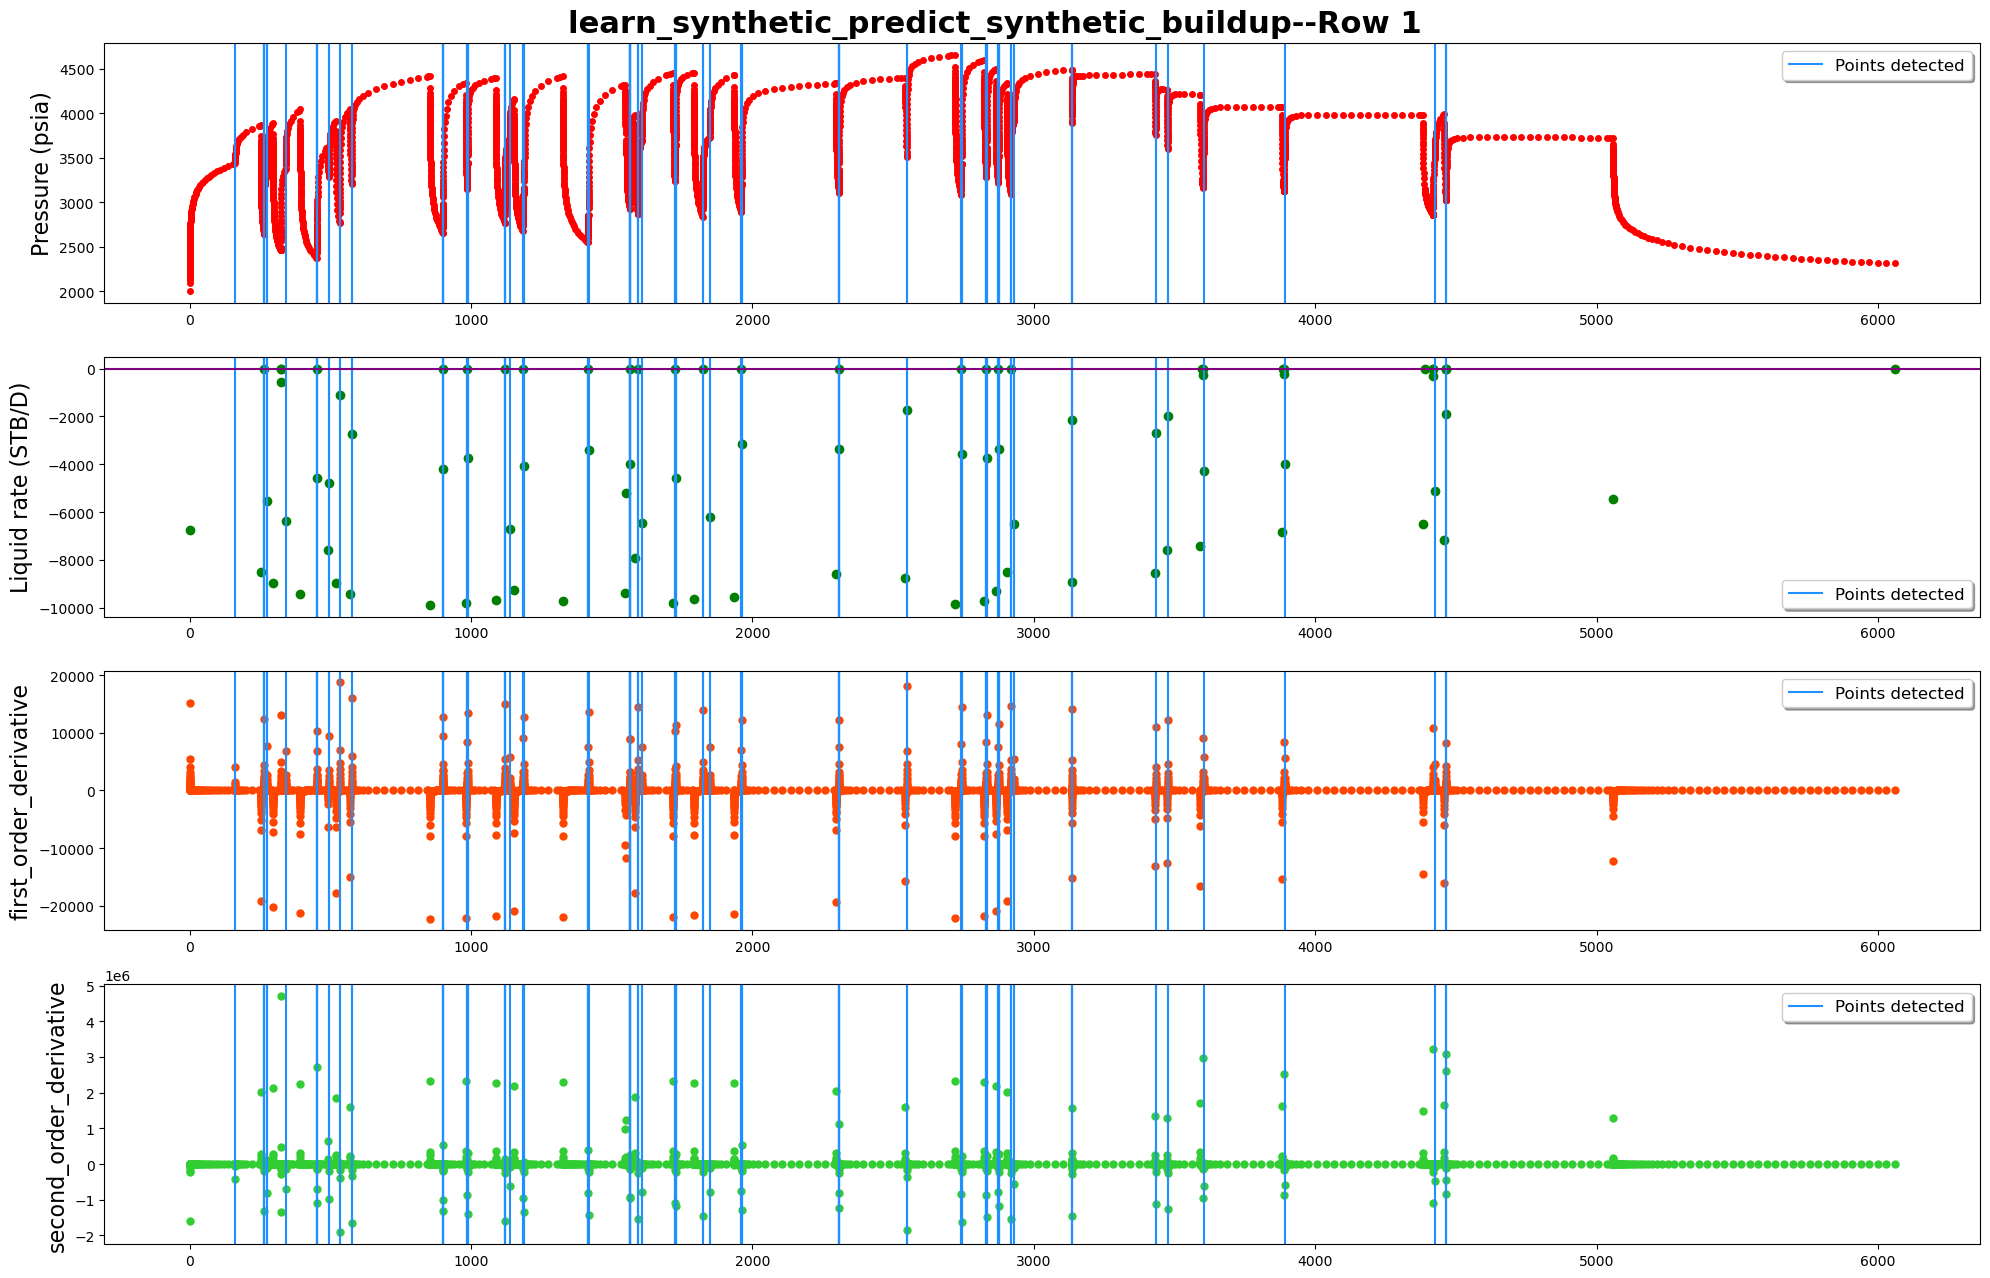

save whole....
detected 115 points as breakpoints
The plot is devided into 9 rows
------row 1-----detected points:[80, 162, 163, 164, 165, 219, 221, 350]
------row 2-----detected points:[446, 447, 478, 479, 480, 523, 524, 568, 569, 611, 612, 713, 714, 743, 744, 745]
------row 3-----detected points:[818, 819, 821, 858, 859, 861, 951, 952, 953, 954, 1014, 1101, 1102, 1151, 1152]
------row 4-----detected points:[1254, 1255, 1289, 1290, 1291, 1396, 1397, 1432, 1433, 1434, 1435, 1439, 1512, 1513, 1514, 1571, 1572]
------row 5-----detected points:[1646, 1647, 1649, 1691, 1692, 1693, 1694, 1784, 1785, 1848, 1849, 1938, 1939, 1980, 1981, 1982]
------row 6-----detected points:[2073, 2074, 2104, 2105, 2106, 2156, 2157, 2247, 2248, 2287, 2288, 2290, 2367, 2368, 2369, 2370]
------row 7-----detected points:[2407, 2408, 2410, 2487, 2488, 2490, 2526, 2527, 2528, 2529, 2609, 2610, 2611, 2667, 2712, 2713, 2714, 2764, 2765]
------row 8-----detected points:[2807, 2808, 2932, 3061]
------row 9-----detecte

In [11]:
pressure_df=pressure_df_synthetic
rate_df=rate_df_synthetic
data_inOneRow=data_inOneRow_synthetic
colum_names=colum_names_synthetic
plot_whole=True
plot_details=False
plot_statistics=False
breakpoints=[buildup2]
names=["buildup"]
txt=print_tuning_parameters(percentile_tuning,fine_tuning)
for points,name in zip(breakpoints,names):
    
    filename_toSave_whole=f"../data_output/Pattern_recognition/learn_synthetic_predict_synthetic_{name}_whole.pdf"
    filename_toSave_details=f"../data_output/Pattern_recognition/learn_synthetic_predict_synthetic_{name}.pdf"
    plot_name=f"learn_synthetic_predict_synthetic_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)

# real case data

## raw data

#todo

## denoised data

### learn from real field, predict real field

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
start to predict using pattern...
after second prediction, there are 1492 detected buildup points, 104 drawdown detected
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after second prediction, the results are filtered further, there are 895 detected buildup points, 284 drawdown detected
*********************************

<Figure size 1440x720 with 0 Axes>

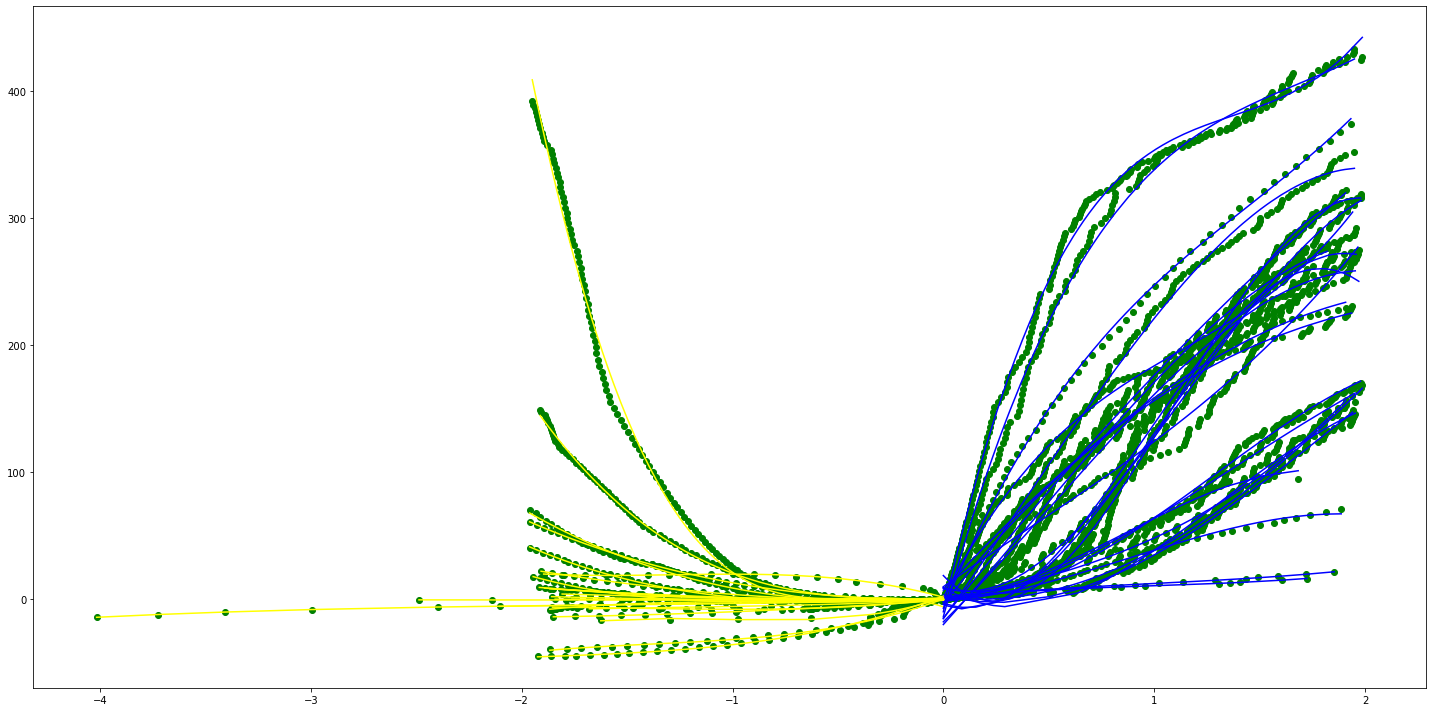

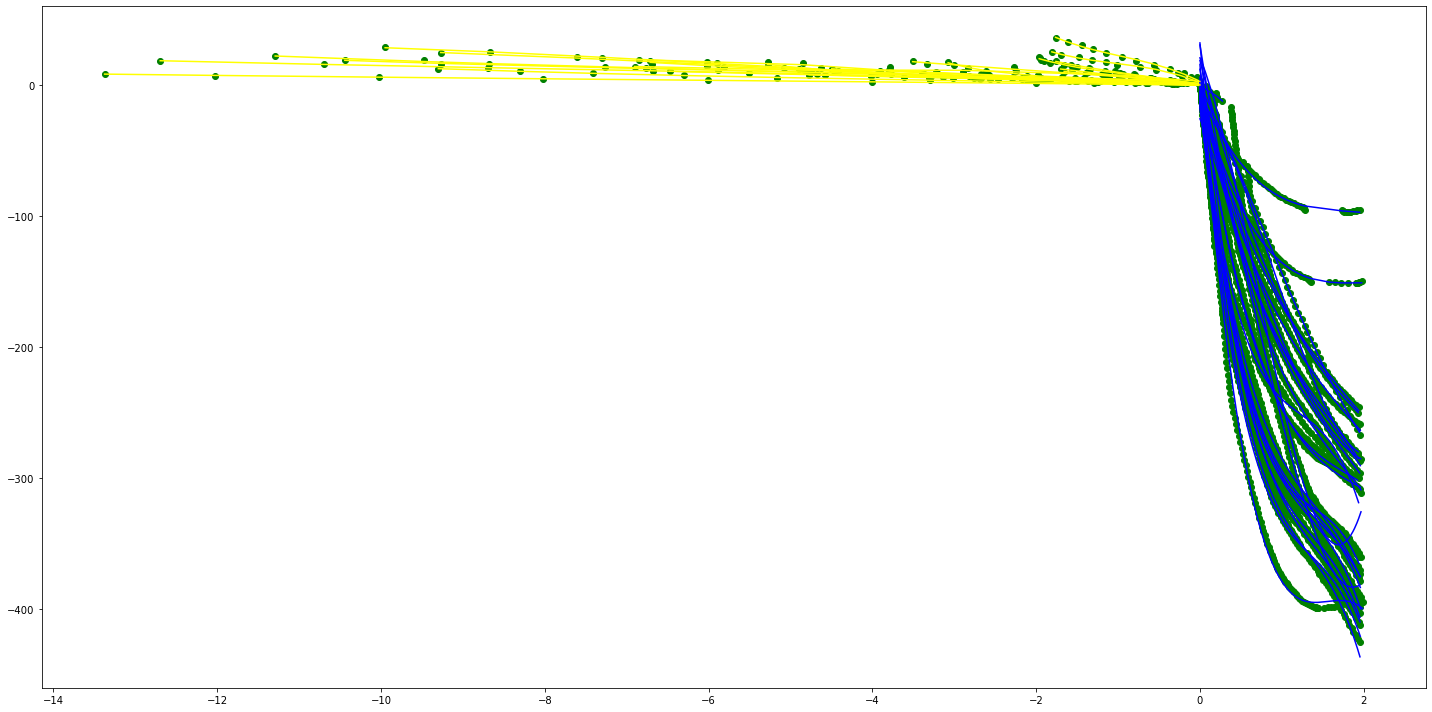

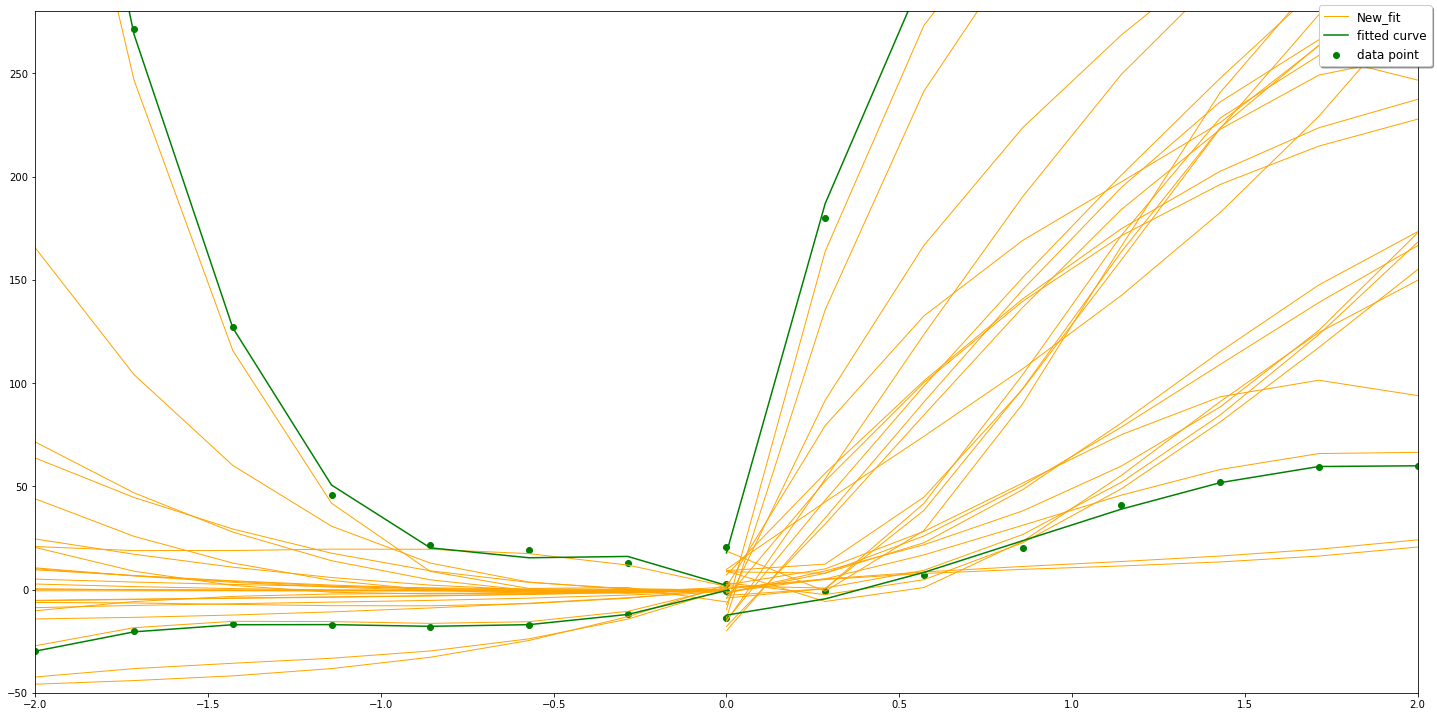

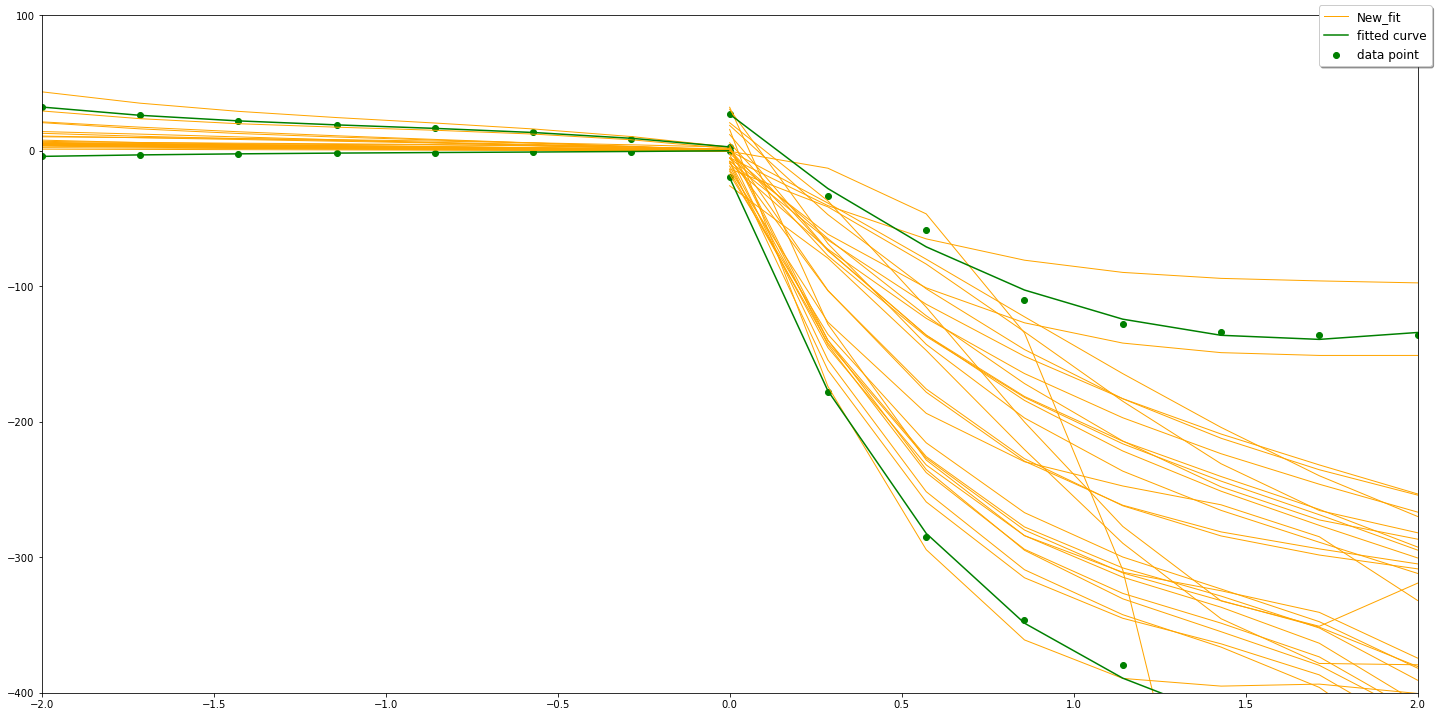

<Figure size 1440x720 with 0 Axes>

In [15]:
#detect
percentile_tuning={
                                    "buildUp":{"left":[100,10],
                                              "right":[100,10]},
                                   "drawDown":{"left":[95,6],
                                              "right":[95,3]}
                                   }


fine_tuning={"buildUp":{"left_top":1.1,
                    "left_bottom":1.1,
                    "right_top":1.1,
                    "right_bottom":0.9},
            "drawDown":{"left_top":1.1,
                        "left_bottom":-1.1,
                        "right_top":0.9,
                        "right_bottom":1.1}}

point_halfWindow=8
identfication_UsePattern=PatternRecognitionMethod(time_halfWindow_forPredict=2,time_halfWindow_forLearn=2,percentile_tuning=percentile_tuning,fine_tuning=fine_tuning)


fitting_type="polynomial"
identfication_UsePattern.learn(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised,fitting_type=fitting_type)
points=[index for index in range(len(pressure_measure_denoised))]
buildup3,drawdown3=identfication_UsePattern.predict(pressure_measure_denoised,pressure_time_denoised,points,fitting_type=fitting_type)
print("************************************")
print(f"result after second detection: buildUp,{len(buildup3)}, drawDown {len(drawdown3)}")

### plot detected points

---initializing...
---plotting...


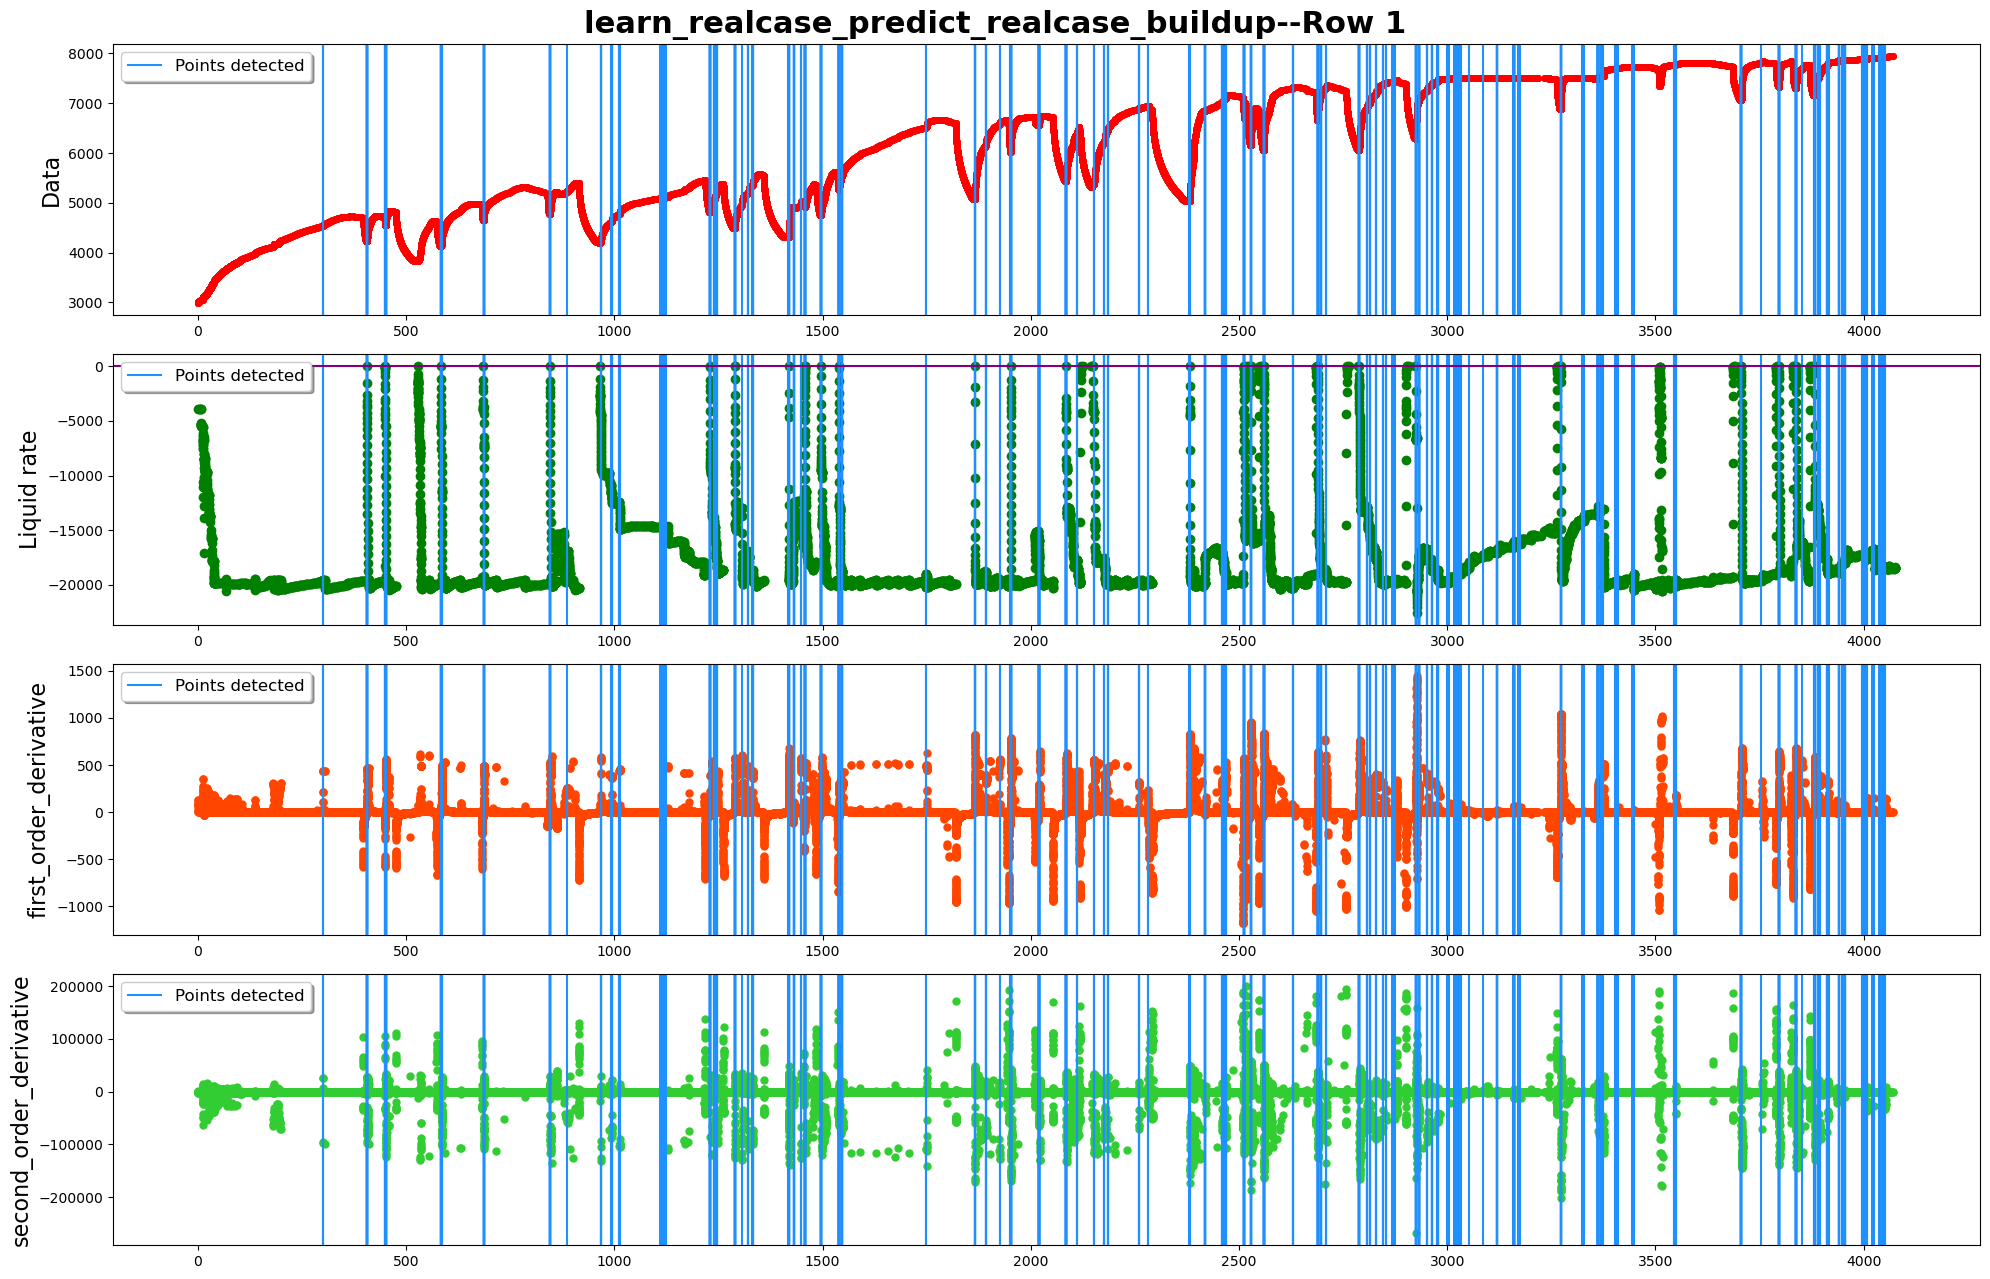

save whole....
detected 895 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]
------row 2-----detected points:[2111, 2112]
------row 3-----detected points:[2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901]
------row 4-----detected points:[4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4255, 4256, 4257, 4258, 4259, 4260]
------row 5-----detected points:[4899, 4901, 4902, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5833]
------row 6-----detected points:[6571, 6572, 6573, 6574, 6575, 6769, 6770, 6771, 6772, 6773, 6865, 6866, 6868, 6869, 7026, 7027, 7028, 7029, 7030, 7031, 7033, 7034, 7035]
------row 7-----detected points:[7542, 7543, 7544, 

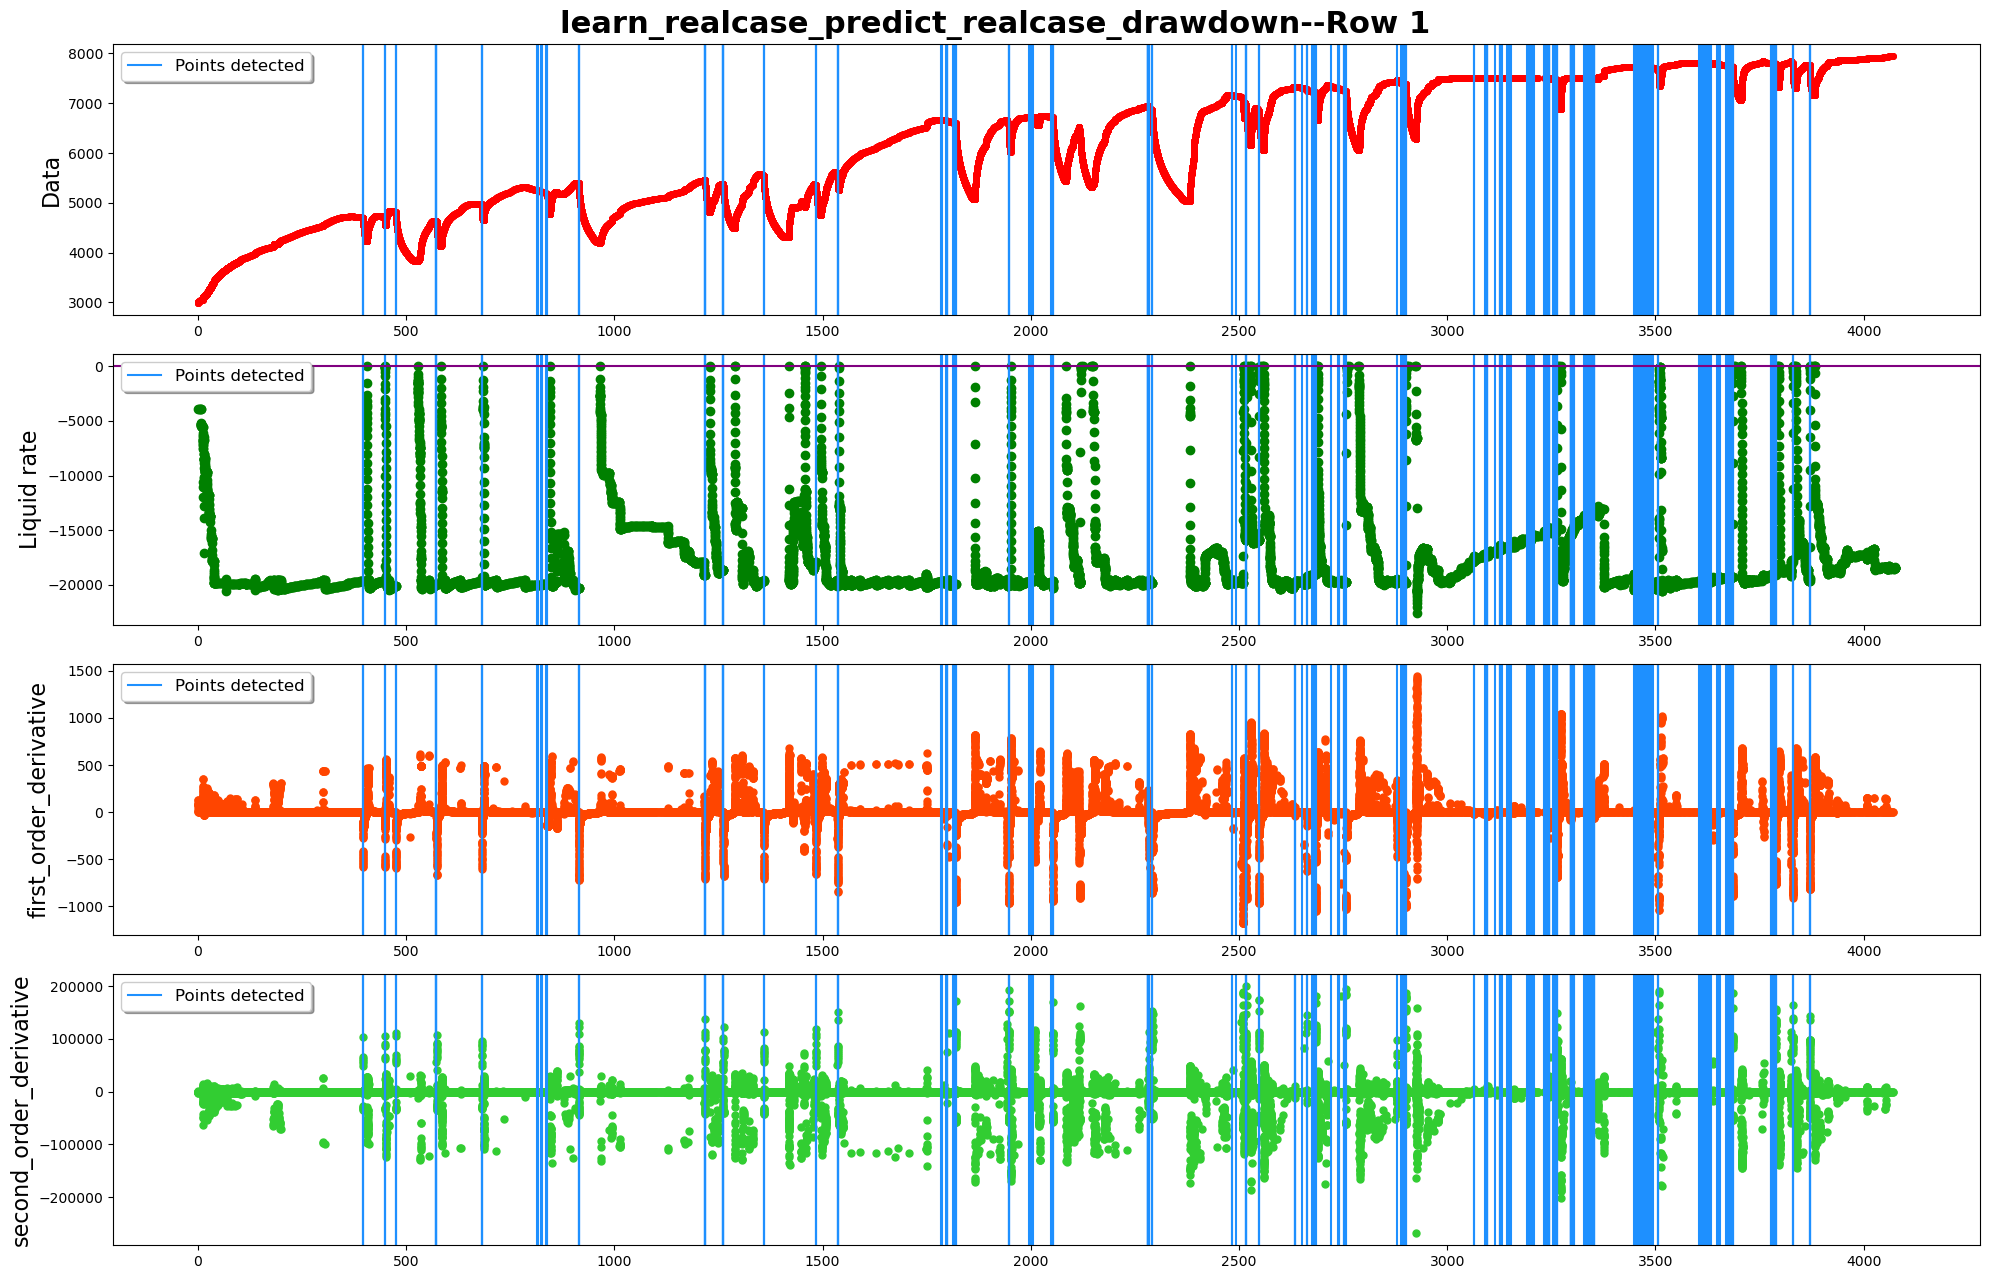

save whole....
detected 284 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]
------row 2-----detected points:[2248, 2249, 2250]
------row 3-----detected points:[2804, 2805, 2806, 3095, 3096, 3097]
------row 4-----detected points:[3987, 3988, 3989, 3990, 3991, 3992, 4750, 4751, 4752, 4753]
------row 5-----detected points:[5280, 5281, 5287, 5288, 5295, 5297, 5298, 5983, 5984, 5985, 5986]
------row 6-----detected points:[]
------row 7-----detected points:[7247, 7248, 7249, 7250, 7251, 7252, 7945, 7946, 7947, 7948, 7949, 7950]
------row 8-----detected points:[9023, 9024, 9025]
------row 9-----detected points:[10526, 10527, 10528]
------row 10-----detected points:[11339, 11340, 11341, 11342, 11343]
------row 11-----detected points:[12315, 12316, 12334, 12337, 12338, 12339, 12340, 12341, 12358, 12359, 12361, 12362, 12363]
------row 12-----detected points:[13866, 13867, 13868, 13869]
------row 13-----detected points:[14426, 14427, 14428, 14429, 14430, 

In [23]:
#plot & save
pressure_df=pressure_df_denoised
rate_df=rate_df_denoised
colum_names=colum_names_denoised
data_inOneRow=data_inOneRow_denoised
plot_whole=True
plot_details=False
plot_statistics=False
breakpoints=[buildup3,drawdown3]
names=["buildup","drawdown"]
txt=print_tuning_parameters(percentile_tuning,fine_tuning)
for points,name in zip(breakpoints,names):    
    filename_toSave_whole=f"../data_output/Pattern_recognition/learn_realcase_predict_realcase_{name}_whole.pdf"
    filename_toSave_details=f"../data_output/Pattern_recognition/learn_realcase_predict_realcase_{name}_details.pdf"
    plot_name=f"learn_realcase_predict_realcase_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)
     

### plot false detection

5
4
buildUp_NotDetected==================================================
------left
--in buildUp pattern
--8 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--23 points for comparison, 0 points are above top, 9 points under bottom
------left
--in drawDown pattern
--8 points for comparison, 0 points are above top, 1 points under bottom
------right
--in drawDown pattern
--23 points for comparison, 16 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


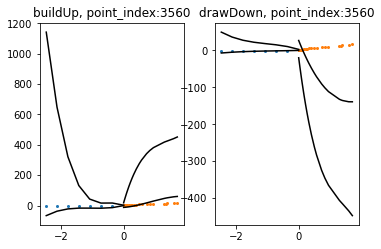

------left
--in buildUp pattern
--34 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--87 points for comparison, 0 points are above top, 19 points under bottom
------left
--in drawDown pattern
--34 points for comparison, 0 points are above top, 7 points under bottom
------right
--in drawDown pattern
--87 points for comparison, 81 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


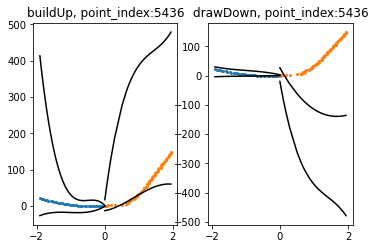

------left
--in buildUp pattern
--8 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--28 points for comparison, 0 points are above top, 12 points under bottom
------left
--in drawDown pattern
--8 points for comparison, 0 points are above top, 2 points under bottom
------right
--in drawDown pattern
--28 points for comparison, 19 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


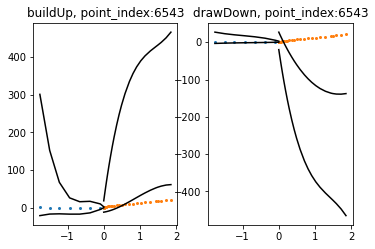

------left
--in buildUp pattern
--34 points for comparison, 0 points are above top, 28 points under bottom
------right
--in buildUp pattern
--170 points for comparison, 0 points are above top, 0 points under bottom
------left
--in drawDown pattern
--34 points for comparison, 0 points are above top, 34 points under bottom
------right
--in drawDown pattern
--170 points for comparison, 162 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


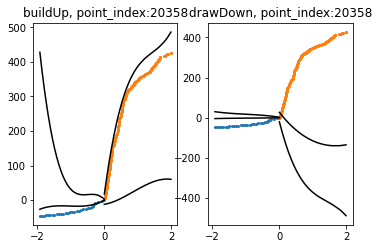

------left
--in buildUp pattern
--30 points for comparison, 0 points are above top, 26 points under bottom
------right
--in buildUp pattern
--140 points for comparison, 0 points are above top, 0 points under bottom
------left
--in drawDown pattern
--30 points for comparison, 0 points are above top, 30 points under bottom
------right
--in drawDown pattern
--140 points for comparison, 133 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


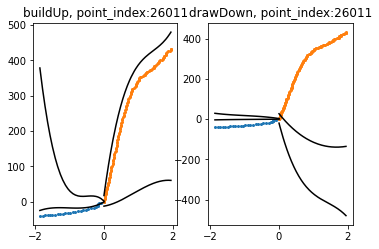

drawDown_NotDetected==================================================
------left
--in buildUp pattern
--10 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--83 points for comparison, 0 points are above top, 75 points under bottom
------left
--in drawDown pattern
--10 points for comparison, 0 points are above top, 1 points under bottom
------right
--in drawDown pattern
--83 points for comparison, 48 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


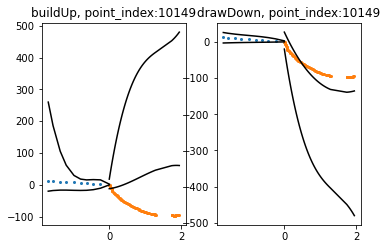

------left
--in buildUp pattern
--13 points for comparison, 4 points are above top, 0 points under bottom
------right
--in buildUp pattern
--121 points for comparison, 0 points are above top, 117 points under bottom
------left
--in drawDown pattern
--13 points for comparison, 12 points are above top, 1 points under bottom
------right
--in drawDown pattern
--121 points for comparison, 0 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


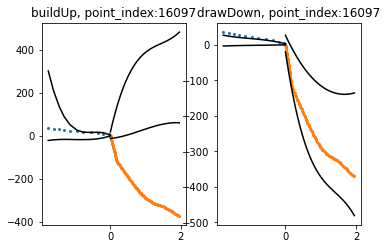

------left
--in buildUp pattern
--8 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--139 points for comparison, 0 points are above top, 134 points under bottom
------left
--in drawDown pattern
--8 points for comparison, 0 points are above top, 1 points under bottom
------right
--in drawDown pattern
--139 points for comparison, 0 points are above top, 56 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


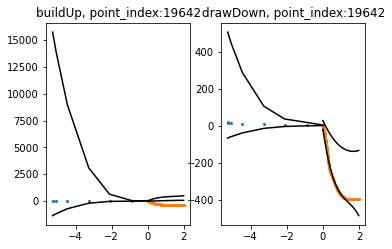

------left
--in buildUp pattern
--8 points for comparison, 0 points are above top, 0 points under bottom
------right
--in buildUp pattern
--10 points for comparison, 0 points are above top, 4 points under bottom
------left
--in drawDown pattern
--8 points for comparison, 0 points are above top, 1 points under bottom
------right
--in drawDown pattern
--10 points for comparison, 5 points are above top, 0 points under bottom


c:\users\junec\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


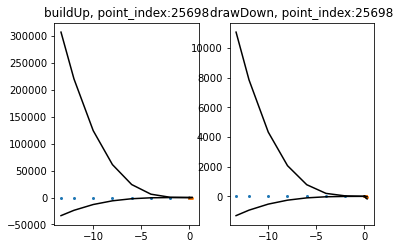

In [26]:
buildUp_NotDetected=[buildUp for buildUp in identfication_UsePattern.breakpoints_forLearn['buildUp'] if buildUp not in buildup3]
print("len(buildUp_notDetected)",len(buildUp_notDetected))
drawDown_NotDetected=[drawDown for drawDown in identfication_UsePattern.breakpoints_forLearn['drawDown'] if drawDown not in drawdown3]
print("len(drawDown_notDetected)",len(drawDown_notDetected))

false_points=[buildUp_NotDetected,drawDown_NotDetected]
names=["buildUp_NotDetected","drawDown_NotDetected"]
for points,name in zip(false_points,names):
    print(f"{name}==================================================")
    for point_index in points:
        identfication_UsePattern.check_in_pattern(identfication_UsePattern.data_forPredict,point_index,True)

In [3]:
# pd.set_option('display.max_rows', pressure_df.shape[0]+1)
# pressure_df.iloc[2500:3000]